In [119]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [120]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./data/*/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename, header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|███████████████████████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 376.28it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,34,69,25137,10967,2604,5321,25031,37279,1725,2549,NaN,NaN,NaN
1,43,74,15167,34062,17446,16113,49284,52473,31642,7755,NaN,NaN,NaN
2,61,64,5726,4932,2482,6996,139747,18902,7644,3362,NaN,NaN,NaN


In [121]:
df = df.iloc[:, :10]
#print(df)
df.columns = ['attention' , 'meditation' ,'LowAlpha','HighAlpha','LowBeta','HighBeta','Delta','Theta','LowGamma','MiddleGamma']
df

,attention,meditation,LowAlpha,HighAlpha,LowBeta,HighBeta,Delta,Theta,LowGamma,MiddleGamma
0,34,69,25137,10967,2604,5321,25031,37279,1725,2549
1,43,74,15167,34062,17446,16113,49284,52473,31642,7755
2,61,64,5726,4932,2482,6996,139747,18902,7644,3362
3,57,64,24948,14535,30571,15185,228001,124834,13174,7611
4,66,57,5626,6658,6843,4939,260240,23033,3564,3302
...,...,...,...,...,...,...,...,...,...,...
55,67,44,2011,885,4578,2170,82906,12088,1596,3445
56,51,27,8654,823,5560,2820,201373,68481,782,1166
57,24,14,2470,1004,1046,763,64186,27932,337,494
58,21,10,5916,10716,8534,9071,184187,91203,4539,9489


In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21649 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   attention    21649 non-null  int64 
 1   meditation   21649 non-null  object
 2   LowAlpha     21649 non-null  int64 
 3   HighAlpha    21649 non-null  int64 
 4   LowBeta      21649 non-null  int64 
 5   HighBeta     21649 non-null  int64 
 6   Delta        21649 non-null  int64 
 7   Theta        21649 non-null  int64 
 8   LowGamma     21649 non-null  int64 
 9   MiddleGamma  21649 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ MB


In [123]:
import pandas as pd
import numpy as np
import mne

# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Remove any rows with NaN values
df = df.dropna()
#data = df.values.T

# Create an MNE Raw object
ch_names = ['attention', 'meditation', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'Delta', 'Theta', 'LowGamma', 'MiddleGamma']
ch_types = ['eeg']*10
sfreq = 256  # sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# add missing channels to info
missing_ch_names = ['attention', 'meditation', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'Delta', 'Theta', 'LowGamma', 'MiddleGamma']
for ch_name in missing_ch_names:
    if ch_name not in info['ch_names']:
        ch_info = mne.create_info(ch_name, sfreq, ch_types='misc')
        info.add_channels([ch_info])

raw = mne.io.RawArray(df.values.T, info)




Creating RawArray with float64 data, n_channels=10, n_times=20881
    Range : 0 ... 20880 =      0.000 ...    81.562 secs
Ready.


In [124]:
data

array([[3.4000e+01, 4.3000e+01, 6.1000e+01, ..., 2.4000e+01, 2.1000e+01,
        1.7000e+01],
       [6.9000e+01, 7.4000e+01, 6.4000e+01, ..., 1.4000e+01, 1.0000e+01,
        2.0000e+01],
       [2.5137e+04, 1.5167e+04, 5.7260e+03, ..., 2.4700e+03, 5.9160e+03,
        9.3560e+03],
       ...,
       [3.7279e+04, 5.2473e+04, 1.8902e+04, ..., 2.7932e+04, 9.1203e+04,
        7.4949e+04],
       [1.7250e+03, 3.1642e+04, 7.6440e+03, ..., 3.3700e+02, 4.5390e+03,
        7.1400e+03],
       [2.5490e+03, 7.7550e+03, 3.3620e+03, ..., 4.9400e+02, 9.4890e+03,
        1.7394e+04]])

In [125]:
import mne
import numpy as np


# Preprocess the data
raw.filter(1, 50)  # filter out unwanted frequency bands
raw.notch_filter(60)  # remove powerline noise

# Create events array
event_id = {'condition1': 1, 'condition2': 2}  # specify the event types and IDs
events = mne.make_fixed_length_events(raw, id=1, start=0, stop=None, duration=1.0)

epochs = mne.Epochs(raw, events, tmin=0, tmax=1, baseline=None, detrend=1, reject=None, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0 bad epochs dropped


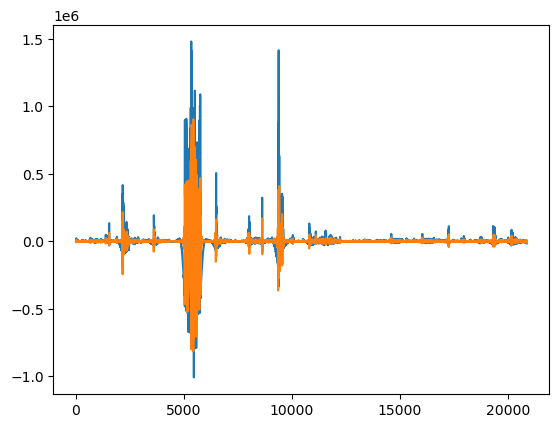

In [126]:
plt.plot(raw.copy().get_data()[9])
plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[9])

In [127]:
ica = mne.preprocessing.ICA(random_state=42, n_components=5)
filtered_raw = raw.copy().filter(1, None, verbose=True)
ica.fit(raw, verbose=True)
#ica.plot_components()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Method,fastica
Fit,16 iterations on raw data (20881 samples)
ICA components,5
Available PCA components,10
Channel types,eeg
ICA components marked for exclusion,—


In [129]:
ica = mne.preprocessing.ICA(random_state=42, n_components=10)
ica.fit(raw.copy().filter(1,None, verbose=False), verbose=False)
#ica.plot_components()

# Manually detect eye blinks
blink_indices = []
for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    #print(amplitude)
    if amplitude > 0.5:  # threshold for blink detection
        blink_indices.append(i)
        print('Component {} has a large amplitude peak, possibly an eye blink'.format(i))

# Plot the blink components
print(len(blink_indices))
#ica.plot_components(blink_indices)


# Plot the raw data with the blink component removed
ica.exclude = blink_indices
raw_ica = raw.copy()
ica.apply(raw_ica)
#ica.plot_sources(raw, blink_indices)
#ica.plot_overlay(raw)
print("no of eye blink components",len(blink_indices))

Component 0 has a large amplitude peak, possibly an eye blink
Component 1 has a large amplitude peak, possibly an eye blink
Component 2 has a large amplitude peak, possibly an eye blink
3
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 10 PCA components
no of eye blink components 3


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Dedu\AppData\Local\Temp\ipykernel_21576\605241236.py:2: RuntimeWarning: Using n_components=10 (resulting in n_components_=10) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.5) and smallest (1.6e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw.copy().filter(1,None, verbose=False), verbose=False)
